In [339]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [247]:
df = pd.read_csv(os.path.join("Data", "2019.csv"))
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [248]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [249]:
data = df.drop(["Country or region", "Overall rank", "Score"], axis=1)

In [337]:
d1 = df.drop(["Country or region", "Overall rank"], axis=1)

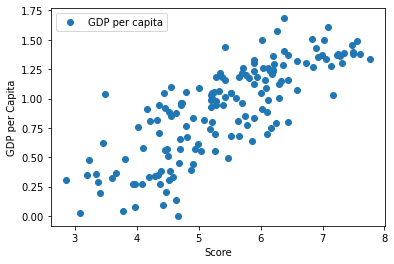

In [261]:
df.plot(x="Score", y="GDP per capita", style = "o")
plt.xlabel("Score")
plt.ylabel("GDP per Capita")
plt.show()

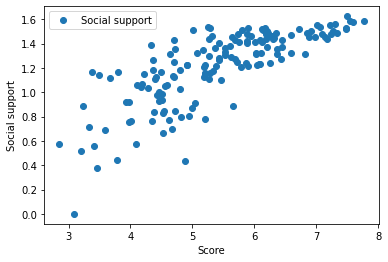

In [277]:
df.plot(x="Score", y="Social support", style = "o")
plt.xlabel("Score")
plt.ylabel("Social support")
plt.show()

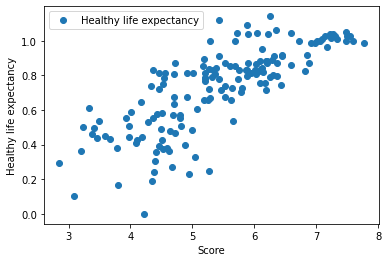

In [278]:
df.plot(x="Score", y="Healthy life expectancy", style = "o")
plt.xlabel("Score")
plt.ylabel("Healthy life expectancy")
plt.show()

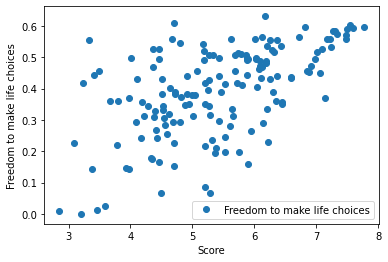

In [279]:
df.plot(x="Score", y="Freedom to make life choices", style = "o")
plt.xlabel("Score")
plt.ylabel("Freedom to make life choices")
plt.show()

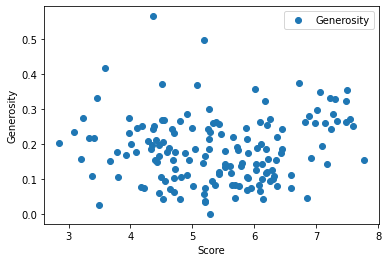

In [280]:
df.plot(x="Score", y="Generosity", style = "o")
plt.xlabel("Score")
plt.ylabel("Generosity")
plt.show()

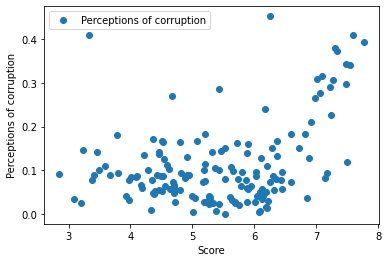

In [281]:
df.plot(x="Score", y="Perceptions of corruption", style = "o")
plt.xlabel("Score")
plt.ylabel("Perceptions of corruption")
plt.show()

In [282]:
data.columns

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [262]:
X = data.values
y = df.iloc[:, 2].values
print(X)
print(y)

[[1.34  1.587 0.986 0.596 0.153 0.393]
 [1.383 1.573 0.996 0.592 0.252 0.41 ]
 [1.488 1.582 1.028 0.603 0.271 0.341]
 [1.38  1.624 1.026 0.591 0.354 0.118]
 [1.396 1.522 0.999 0.557 0.322 0.298]
 [1.452 1.526 1.052 0.572 0.263 0.343]
 [1.387 1.487 1.009 0.574 0.267 0.373]
 [1.303 1.557 1.026 0.585 0.33  0.38 ]
 [1.365 1.505 1.039 0.584 0.285 0.308]
 [1.376 1.475 1.016 0.532 0.244 0.226]
 [1.372 1.548 1.036 0.557 0.332 0.29 ]
 [1.034 1.441 0.963 0.558 0.144 0.093]
 [1.276 1.455 1.029 0.371 0.261 0.082]
 [1.609 1.479 1.012 0.526 0.194 0.316]
 [1.333 1.538 0.996 0.45  0.348 0.278]
 [1.499 1.553 0.999 0.516 0.298 0.31 ]
 [1.373 1.454 0.987 0.495 0.261 0.265]
 [1.356 1.504 0.986 0.473 0.16  0.21 ]
 [1.433 1.457 0.874 0.454 0.28  0.128]
 [1.269 1.487 0.92  0.457 0.046 0.036]
 [1.503 1.31  0.825 0.598 0.262 0.182]
 [1.3   1.52  0.999 0.564 0.375 0.151]
 [1.07  1.323 0.861 0.433 0.074 0.073]
 [1.324 1.472 1.045 0.436 0.111 0.183]
 [1.368 1.43  0.914 0.351 0.242 0.097]
 [1.159 1.369 0.92  0.357

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [264]:
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [265]:
print(classifier.intercept_)

1.2140045936898591


In [266]:
print(classifier.coef_)

[ 0.31863331  2.0139838   1.34272177  0.90306381 -0.00304185  1.40718835]


In [267]:
predictions = classifier.predict(X_test)
predictions

array([5.61869463, 6.53232067, 6.1439471 , 5.21964049, 6.20987603,
       7.2046092 , 5.44329468, 5.67975348, 4.61186353, 6.45244429,
       5.32048101, 6.03936216, 5.14840953, 4.35711193, 5.99947424,
       5.12563446, 7.33213546, 4.39046186, 5.79577463, 3.65970101,
       4.60638734, 7.03500895, 4.35351917, 6.10859534, 3.86362907,
       4.40066262, 5.74667728, 6.07654716, 5.61735569, 5.59110515,
       6.72421454, 6.31166722, 5.44124119, 4.20899986, 5.86905253,
       5.97563489, 3.18242534, 4.18620939, 5.61769924, 6.04343748,
       5.13284398, 3.38781371, 5.98966311, 6.36777871, 5.75578106,
       6.24779325, 5.66369302, 5.39524095, 7.27814567, 4.08216396,
       6.55085617, 4.35235936, 7.06995744, 2.88617753, 5.66971453,
       4.5065588 , 4.40448355, 6.1410234 , 4.6331935 , 5.46190881,
       3.74112959, 4.0616649 , 3.39233193, 5.09974658, 1.61500096,
       4.59968219, 6.01459417, 5.89623154, 5.68102797, 3.77817428,
       5.57062239, 5.77506403, 5.88419531, 5.90241742, 6.98329

In [268]:
Hdf = pd.DataFrame({"Actual": y_test, "Prediction":predictions})
Hdf

,Actual,Prediction
0,6.436,5.618695
1,5.893,6.532321
2,6.198,6.143947
3,4.639,5.219640
4,6.446,6.209876
...,...,...
73,6.046,5.902417
74,7.090,6.983295
75,4.461,4.843795
76,4.681,4.772488


In [283]:
feature_names = data.columns
data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298


In [306]:
target = df["Score"].astype(int)

In [327]:

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=30)

In [328]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5641025641025641

In [329]:
rf = RandomForestClassifier(n_estimators=10)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6153846153846154

In [332]:
happyRF = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
happyRF

[(0.2392719457398133, 'Social support'),
 (0.18631830891220086, 'GDP per capita'),
 (0.18209342745357068, 'Healthy life expectancy'),
 (0.16636597865552835, 'Perceptions of corruption'),
 (0.13749866408360495, 'Freedom to make life choices'),
 (0.08845167515528188, 'Generosity')]

In [338]:
d1.corr()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


Text(0.5, 1.0, 'Correlation Map')

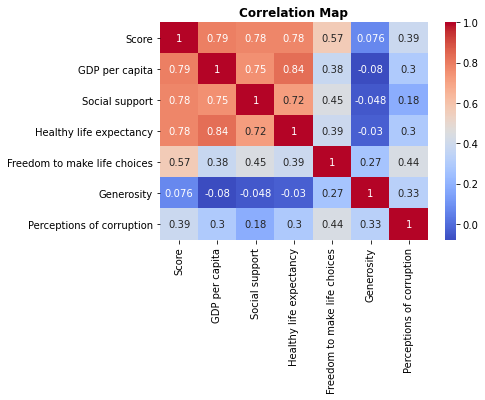

In [360]:
heatMap = sns.heatmap(d1.corr(), cmap="coolwarm", annot=True)

plt.title("Correlation Map", weight="bold")